In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   


In [47]:
Amazon_df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'amz_uk_price_prediction_dataset.csv'

In [ ]:
Amazon_df['category'].value_counts()


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [ ]:
Amazon_df['category'].value_counts().head(5)


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

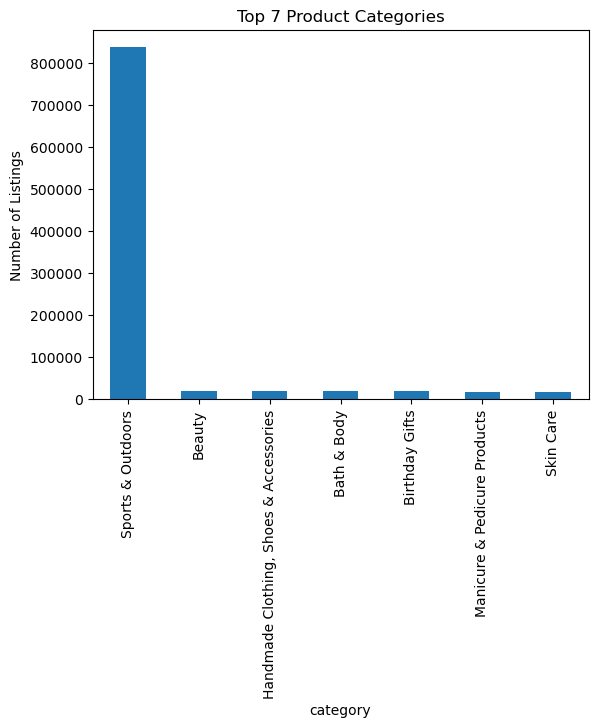

In [ ]:
top10 = Amazon_df['category'].value_counts().head(7)

top10.plot(kind='bar')
plt.title('Top 7 Product Categories')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.show()


En el barcode presente, podemos observar una preponderancia absoluta de pedidos dedidados a la realización de actividades deportivas y al aire libre, seguidas, muy a lo lejos, por productos de belleza

In [ ]:
#2. Análisis de la variable 'price'

Amazon_df['price'].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [ ]:
Amazon_df['price'].mode()

0    9.99
Name: price, dtype: float64

In [ ]:
Amazon_df['price'].median()

19.09

In [ ]:
price_range = Amazon_df['price'].max() - Amazon_df['price'].min()
price_range

100000.0

En relación con el precio de los productos, y al trabajar con una gama amplia de productos, vemos una desproporcionalidad en cuanto a los valores y su variación. Vemos una media de consumo de 89.24 libras, frente a una mediana de 19 y una moda de 10, aproximadamente.
Esto puede ser explicado ya que estamos evaluando los precios a modo global y no por categoría de productos.

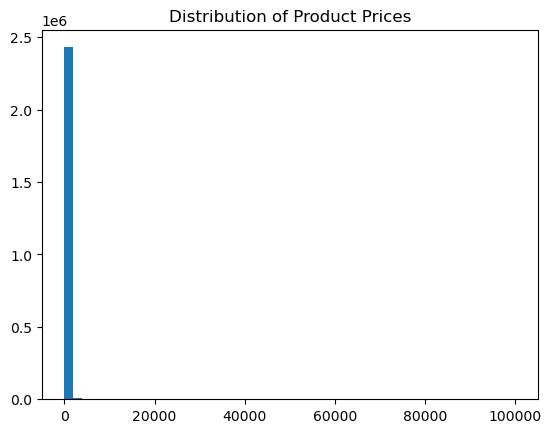

In [ ]:
plt.hist(Amazon_df['price'], bins=50)
plt.title('Distribution of Product Prices')
plt.show()


In [ ]:
#Esto no tiene ningún sentido de análisis, pero es para mostrar cómo se ve la distribución de precios en una escala logarítmica, lo que puede ayudar a visualizar mejor los datos si hay muchos valores extremos (outliers) o una distribución muy sesgada.

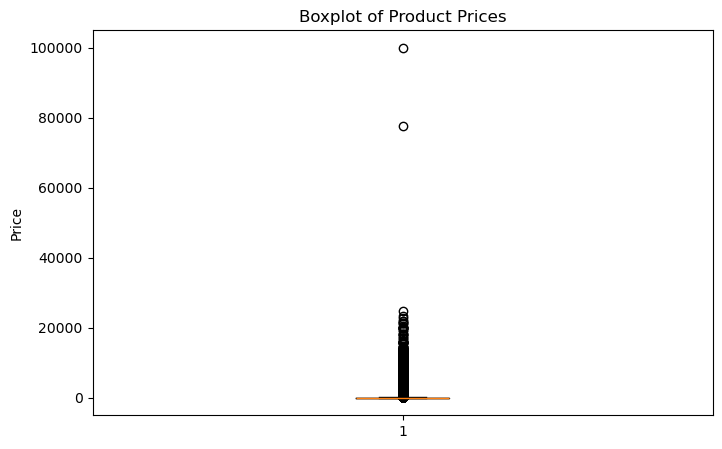

In [ ]:


plt.figure(figsize=(8,5))
plt.boxplot(Amazon_df['price'])
plt.title('Boxplot of Product Prices')
plt.ylabel('Price')
plt.show()


In [ ]:
#En el boxplot vemos claramente una gran concentración de los precios en la parte baja, pudiendo observar la razón que explica la gran diferencia entre la media y la mediana, y también la gran cantidad de valores extremos (outliers) que hay en el dataset. Esto sugiere que la mayoría de los productos tienen precios bajos, pero hay algunos productos con precios muy altos que están afectando la media.

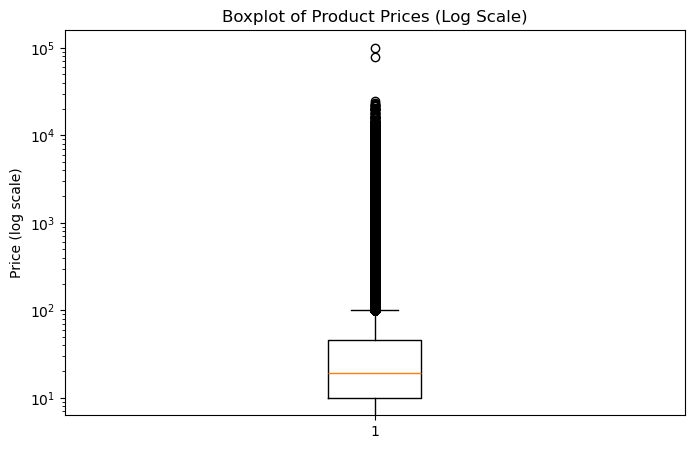

In [ ]:
#Alternativa de bloxplot

plt.figure(figsize=(8,5))
plt.boxplot(Amazon_df['price'])
plt.yscale('log')
plt.title('Boxplot of Product Prices (Log Scale)')
plt.ylabel('Price (log scale)')
plt.show()


In [ ]:
#Parte 3. Análisis del 'rating', en este caso, por medio de la variable 'stars'

Amazon_df.columns   

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [ ]:
Amazon_df['stars'].describe().round(2)


count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

In [ ]:
Amazon_df['stars'].mode()


0    0.0
Name: stars, dtype: float64

In [ ]:

Amazon_df['stars'].median()

0.0

In [ ]:
Amazon_df['stars'].std()
Amazon_df['stars'].skew()
Amazon_df['stars'].kurt()


np.float64(-1.9260061280432994)

In [ ]:
#Hasta ahora, vemos que buena parte de los productos, viendo los valores medios y medianos, no están calificados por los usuarios, o tienen una calificación de 5 estrellas. Esto se puede deber a que muchos productos no tienen suficientes reseñas para generar una calificación confiable, o a que los usuarios tienden a dejar reseñas positivas, lo que puede sesgar la distribución de las calificaciones hacia valores altos. Además, la desviación estándar es relativamente baja, lo que indica que la mayoría de las calificaciones están cerca de la media, y el valor de skewness positivo sugiere que hay una cola hacia la derecha en la distribución de las calificaciones, lo que podría indicar que hay algunos productos con calificaciones muy altas que están afectando la media. El valor de kurtosis también es positivo, lo que indica que la distribución de las calificaciones tiene colas más pesadas que una distribución normal, lo que podría ser un indicio de la presencia de valores extremos (outliers) en las calificaciones.

In [ ]:
df_rated = Amazon_df[Amazon_df['stars'] > 0]


In [ ]:
df_rated['stars'].describe().round(2)
df_rated['stars'].skew().round(2)


np.float64(-2.38)

In [ ]:
df_rated = Amazon_df[Amazon_df['stars'] > 0]
df_rated['stars'].describe().round(2)


count    1218010.00
mean           4.32
std            0.56
min            1.00
25%            4.10
50%            4.40
75%            4.60
max            5.00
Name: stars, dtype: float64

Al excluir los productos con valoraciones iguales a 0 (que representan ausencia de rating y no una valoración real), se observa que la distribución de las puntuaciones está altamente concentrada en valores elevados.

La media de las valoraciones es 4.32 y la mediana es 4.40, lo que indica que los productos tienden a recibir evaluaciones positivas por parte de los clientes. Esto podemos observarlo, también, en una dispersión reducida y una alta consistencia en las puntuaciones.

El skewness negativo indica una distribución sesgada hacia la izquierda. Esto significa que la mayoría de los productos presentan valoraciones altas (4–5 estrellas), mientras que las valoraciones bajas son poco frecuentes.

En conclusión, los productos con valoraciones tienden a estar muy bien puntuados y muestran un patrón de distribución claramente concentrado en los valores superiores de la escala.

Si